In [3]:
import numpy as np
import cv2

# Create a grayscale test image
gray_image = np.random.randint(0, 256, (256, 256), dtype=np.uint8)
cv2.imwrite("gray_test.jpg", gray_image)

# Create a color test image
color_image = np.random.randint(0, 256, (256, 256, 3), dtype=np.uint8)
cv2.imwrite("color_test.jpg", color_image)


True

Saving download.jpg to download (1).jpg


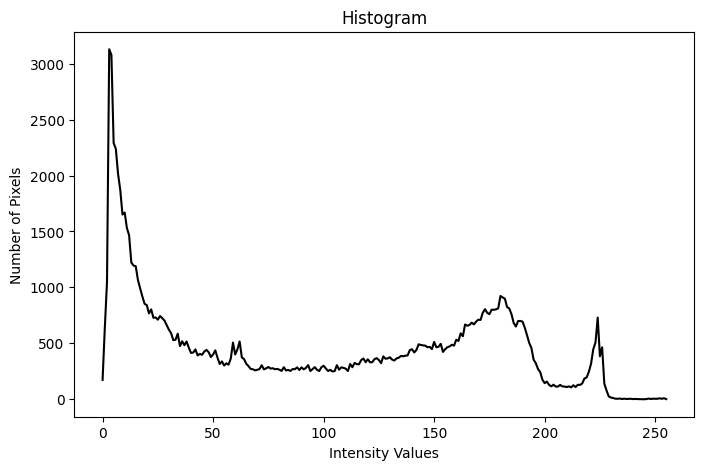

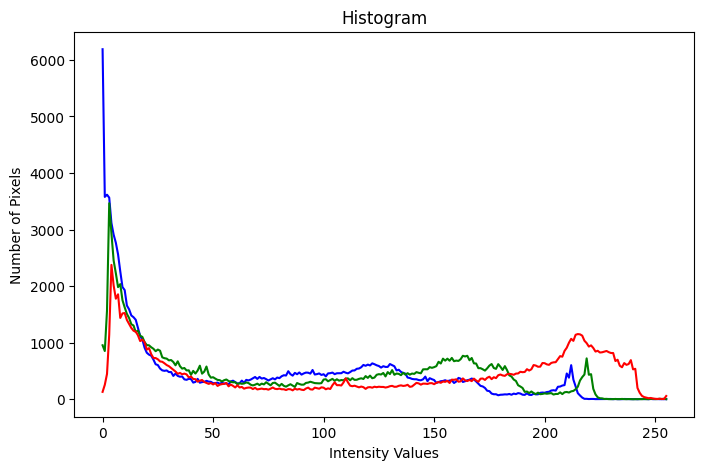

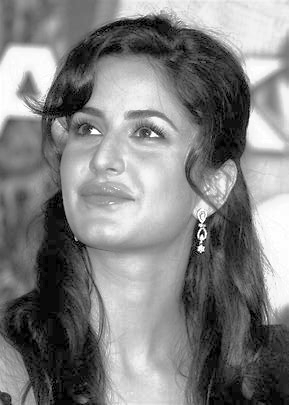

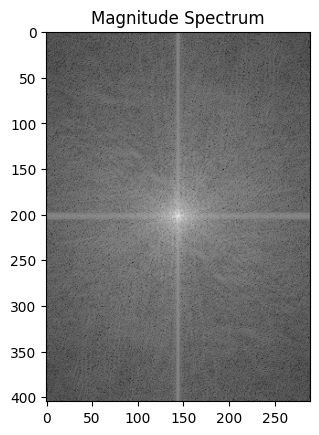

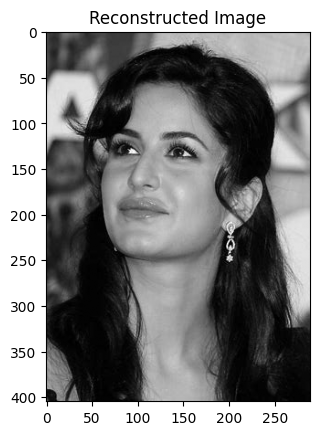

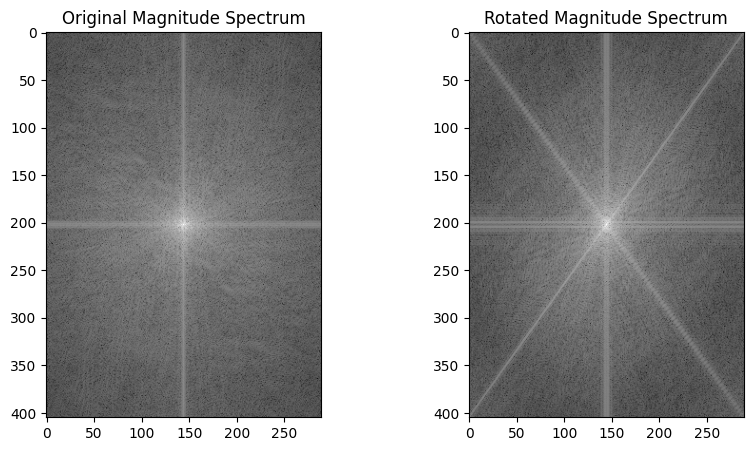

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Fix for Colab

def compute_histogram(image, is_gray=True):
    if is_gray:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    else:
        hist = [cv2.calcHist([image], [i], None, [256], [0, 256]) for i in range(3)]
    return hist

def plot_histogram(hist, is_gray=True):
    plt.figure(figsize=(8, 5))
    if is_gray:
        plt.plot(hist, color='black')
    else:
        colors = ('b', 'g', 'r')
        for i, color in enumerate(colors):
            plt.plot(hist[i], color=color)
    plt.xlabel('Intensity Values')
    plt.ylabel('Number of Pixels')
    plt.title('Histogram')
    plt.show()

def histogram_equalization(image):
    return cv2.equalizeHist(image)

def fourier_transform(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
    return magnitude_spectrum

def inverse_fourier_transform(dft_shift):
    dft_ishift = np.fft.ifftshift(dft_shift)
    img_back = np.fft.ifft2(dft_ishift)
    return np.abs(img_back)

def rotate_image(image, angle):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

# ---- Upload Image in Colab ----
from google.colab import files
uploaded = files.upload()

# Read uploaded image
image_path = list(uploaded.keys())[0]  # Get the uploaded filename
image_color = cv2.imread(image_path)
if image_color is None:
    print("Error: Image not found!")
else:
    image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    # Compute and display histograms
    hist_gray = compute_histogram(image_gray)
    plot_histogram(hist_gray)

    hist_color = compute_histogram(image_color, is_gray=False)
    plot_histogram(hist_color, is_gray=False)

    # Histogram equalization
    equalized_image = histogram_equalization(image_gray)
    cv2_imshow(equalized_image)  # Use cv2_imshow() for Colab

    # Fourier Transform
    magnitude_spectrum = fourier_transform(image_gray)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.show()

    # Inverse Fourier Transform
    reconstructed_image = inverse_fourier_transform(np.fft.fftshift(np.fft.fft2(image_gray)))
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title('Reconstructed Image')
    plt.show()

    # Rotation and Fourier Transform property verification
    rotated_image = rotate_image(image_gray, 45)
    rotated_spectrum = fourier_transform(rotated_image)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Original Magnitude Spectrum')

    plt.subplot(1, 2, 2)
    plt.imshow(rotated_spectrum, cmap='gray')
    plt.title('Rotated Magnitude Spectrum')

    plt.show()
